# Processus de Galton-Watson

# 0. Notes

-Est ce qu'il faut compliquer les programmes pour inclure les exeptions/rendre le tout plus accessible ou laisser les programmes brut avec les tests?
Comment organiser la page?

-La première partie peut être une partie "statistique" une variable aléatoire simulée. On peut donc inclure des notions d'échantillion et d'intervalles de confiance. La seconde peut être une partie proba donc plus lié à la théorie est à l'approche mathématique.
Conséquence? => plus de python = plus de stat et plus de maths = plus de proba

-Calculer intervalle de confiance pour le nombre d'un individus pour lequel on considère que Pext=0.

-Renommer la variable Z en demographie? #détail

-Faut-il mettre les interprétations/observations sous les graphes?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
from math import *
%matplotlib inline

## I. Evolution d'une population

Dans cette partie nous allons simplement voir l'évolution d'une population en fonction du paramètre λ.

In [2]:
def evo(λ, n, m):
    """Prend en entrée le paramètre λ de la loi de Poisson et n le nombre de générations à simuler.
    Retourne un graphe du nombre d'individus dans la population en fonction du nombre de générations."""
    
    Z = [1] #population au fil des générations.
    i = 0   #génération
    extinction = False
    
    while Z[-1] != 0 and Z[-1] < m and i < n: #on considère que Pext=0 quand la population 
        zn = 0                                #population à la génération n.
        for j in range(Z[-1]):
            zn += npr.poisson(λ)
        Z.append(zn)
        i += 1
    
    if Z[-1] == 0: extinction = True

    return extinction, i, Z

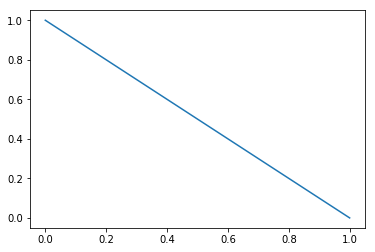

In [3]:
extinction, generation , demographie = evo(1.3,100,500)

x = [i for i in np.arange(0,generation+1,1)]
y = demographie

plt.plot(x,y)

## II. Statistiques sur plusieurs populations

In [4]:
def Pext_moyenne(λ, n, m, nb_pop):
    """Calcule la proportion moyenne des populations éteintes.
    On prend en entrée λ le paramètre de la loi Poisson, n le nombre de générations à simuler pour une population, 
    m le nombre à partir duquel on considère qu'il n'y aura pas extinction et nb_pop le nombre de population à simuler.
    On retourne une variable de type float."""
    
    pop_eteinte = 0
    
    for i in range(nb_pop):
        temp = evo(λ,n,m)[0]
        if temp:
            pop_eteinte += 1
    return pop_eteinte / nb_pop

In [5]:
Pext_moyenne(2,50,500,500)

0.206

In [6]:
def Pext_λ():
    """Renvoie une courbe décrivant la probabilité d'extinction d'une population en fonction du paramètre λ."""
    x = [i for i in np.arange(0,10,0.05)]
    y = [Pext_moyenne(i,50,500,50) for i in x]
    plt.plot(x,y)
    plt.grid()

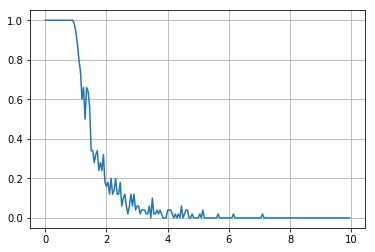

In [7]:
Pext_λ()

Observation : Pour une éxécution du programme plus rapide et un résultat plus proche de la théorie il vaut mieux augmenter le nombre de populations testées que le pas des λ.

## III. Valeurs extrêmes

### 3.1 Plus grosse démographie atteinte par une population s'étant éteinte

In [8]:
def ext_max(λ, n, m, nb_pop):
    """Fonction calculant le nombre maximum d'individus atteint par une population éteinte."""
    
    maximum = -1
    
    for i in range(nb_pop):
        
        max_temp = -1
        extinction, generation, Z = evo(λ, n, m)
        
        if extinction:
            max_temp = max(Z)
            if max_temp > maximum:
                maximum = max_temp
                
    return maximum

In [9]:
ext_max(1.1,100,1000,100)

26

Quelle est la plus grosse démographie atteinte par un population s'étant éteinte en fonction de λ?

In [10]:
def demographie_λ(n, m, nb_pop):
    x = [i for i in np.arange(0,7,0.05)]
    y = [ext_max(i,n,m,nb_pop) for i in x]
    plt.plot(x,y)
    plt.grid()

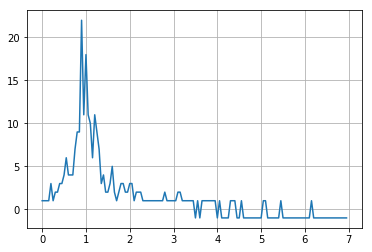

In [11]:
demographie_λ(75, 500, 50)

C'est aux alentours de 1 qu'il y a "les plus grosses populations subissant une extinction".

### 3.2 Croissance maximal d'une population.

In [12]:
def croissance_max(λ, n, m, nb_pop):
    """Calcul de la croissance maximum d'une population parmis un certain nombre."""
    
    maximum = -1
    
    for i in range(nb_pop):
        
        max_temp = -1
        extinction, generation, Z = evo(λ,n,m)
        
        if not extinction:
            max_temp = Z[-1] / n
        
        if max_temp > maximum:
                maximum = max_temp
    
    m = round(maximum,2)
    
    return maximum

In [13]:
croissance_max(1.1, 75, 500, 100)

7.613333333333333

Quelle est la croissance maximale d'une population en fonction de λ?

In [35]:
def croissance_λ(n, m, nb_pop):
    x = [i for i in np.arange(0,50,0.05)]
    y = [croissance_max(i,n,m,nb_pop) for i in x]
    plt.plot(x,y)
    plt.grid()

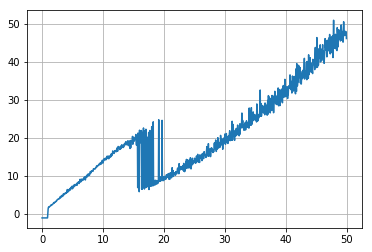

In [36]:
croissance_λ(75, 100, 500)

Comment expliquer que la courbe est des perturbations surl'intervalle [15;19]?

## IV. Probabilité d'extinction en fonction de λ

In [16]:
def G(x0, λ):
    """Prends en entrée un réel s compris entre 0 et 1 ainsi qu'un lambda strictement positif, paramètre de la loi Poisson. 
    Il sort la valeur pour s de la fonction génératrice de la variable aléatoire X suivant un loi poisson de paramètre λ."""
    sum = 0
    for k in range(10):
        sum += exp(-λ)*(λ**k/factorial(k))*x0**k
    return sum

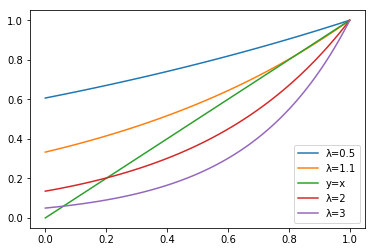

In [17]:
x = [i for i in np.arange(0,1.01,0.01)]

y = [G(i,0.5) for i in x]
plt.plot(x,y, label="λ=0.5") 

y = [G(i,1.1) for i in x]
plt.plot(x,y, label="λ=1.1")

plt.plot(x,x, label="y=x")

y = [G(i,2) for i in x]
plt.plot(x,y, label="λ=2")

y = [G(i,3) for i in x]
plt.plot(x, y, label="λ=3")

plt.legend()

Dans un premier temps nous allons utiliser la méthode de newton pour trouver le point fixe correspondant à la probabilité d'extinction.

In [18]:
def Pext_newton(λ, x0, e):
    """Soit G la fonction génératrice d'une variable aléatoire suivant une loi Poisson de paramètre λ.
    Ceci est une fonction déterminant la probabilité d'extinction d'une population (point fixe de G sur [0;1]).
    On utilise la méthode Newton pour approcher la valeur du point fixe."""
    
    def G(x0):
        """Prends en entrée un réel s compris entre 0 et 1 ainsi qu'un lambda strictement positif, paramètre de la loi Poisson. 
        Il sort la valeur pour s de la fonction génératrice de la variable aléatoire X suivant un loi poisson de paramètre λ."""
        sum = 0
        for k in range(10):
            sum += exp(-λ)*(λ**k/factorial(k))*x0**k
        return sum - x0
    
    def dg(x):
        return (G(x+0.00001)-G(x-0.00001))/0.00002 
    
    def h(x):
        return x - G(x)/dg(x)
    
    l = [x0]
    L = [x0]
    
    while L[-1] > e:
        l.append(h(l[-1]))
        L.append(abs(l[-2]-l[-1]))
        print(l[-1])
    return l

0.1946282643473024
0.20313885221232308
0.20318786832735095


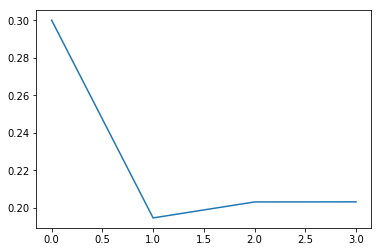

In [19]:
l=Pext_newton(2, 0.3, 0.0001)
plt.plot(l);

Le point positif de cette méthode est qu'elle converge vite, on s'approche du point fixe plus vite qu'avec la méthode de dichotomie. Cependant, il est nécéssaire d'avoir une idée de la probabilité d'extinction pour pouvoir saisir un x0 pas trop loin du point fixe. Sinon on obtient un résultat faux. On peut essayer avec λ = 2, x0 = 0.8 et e=0.001 pour s'en convaincre.

In [20]:
def Pext_dicho(λ,e):
    """Soit G la fonction génératrice d'une variable aléatoire suivant une loi Poisson de paramètre l.
    Ceci est une fonction déterminant la probabilité d'extinction d'une population (point fixe de G sur [0;1]).
    On utilise la méthode de dichotomie pour approcher la valeur du point fixe."""
    
    def G(x0):
        """Prends en entrée un réel s compris entre 0 et 1 ainsi qu'un lambda strictement positif, paramètre de la loi Poisson. 
        Il sort la valeur pour s de la fonction génératrice de la variable aléatoire X suivant un loi poisson de paramètre λ."""
        sum = 0
        for k in range(10):
            sum += exp(-λ)*(λ**k/factorial(k))*x0**k
        return sum - x0
    
    a=0
    b=1
    D=[]
    
    while b-a > e:
        c=(a+b)/2
        if G(a)*G(c)<0:
            a,b=a,c
        else:
            a,b=c,b
        D.append((b+a)/2)
    return D

In [21]:
print(Pext_dicho(2, 0.001)[-1])

0.20361328125


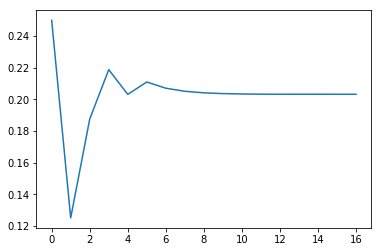

In [22]:
y = Pext_dicho(2, 0.00001)
plt.plot(y)

Nous avons donc vu quelques résultats avec λ fixé. A présent, nous allons voir comment évolut la valeur du point fixe en fonction de la valeur du paramètre λ.

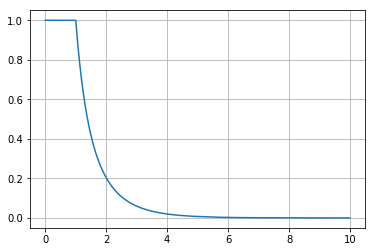

In [23]:
x = [i for i in np.arange(0,10,0.01)]
y = [Pext_dicho(i, 0.0001)[-1] for i in x]
plt.plot(x,y)
plt.grid()